# Inference results analysis

This notebooks details the results of the inference for a nnUNet trained with 2 channels: 
- first channel : STIR or inverted PSIR image
- spinal cord segmentation

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
import ptitprince as pt

In [22]:
metrics_2d_multichannel = pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_multichannel/inference_test_111_2d_fold2_BIDS_metrics/results.csv')
metrics_2d_region_based = pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/2023_11_08_lesion_seg_models_and_results/nnunet_region-based_(SC+lesion)_training_on_STIR_and_inverted_PSIR_data/test_inference_D222_fold_2_2d_metrics/results.csv')
metrics_sct = pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/2023_11_08_lesion_seg_models_and_results/inference_sct_deepseg_lesion/inference_results_sct_deepseg_lesion_BIDS_metrics/results.csv')

#print  number of e,pty masks in GT
print("number of empty masks in GT: ", metrics_2d_multichannel['empty_mask'].sum())

# we look at PPVL
PPVL_multi = metrics_2d_multichannel['PPVL'].dropna()
PPVL_RB = metrics_2d_region_based['PPVL'].dropna()
PPVL_sct = metrics_sct['PPVL'].dropna()


#then we look ath SensL
SensL_multi = metrics_2d_multichannel['SensL'].dropna()
SensL_RB = metrics_2d_region_based['SensL'].dropna()
SensL_sct = metrics_sct['SensL'].dropna()

# and finally F1_score
F1_multi = metrics_2d_multichannel['F1_score'].dropna()
F1_RB = metrics_2d_region_based['F1_score'].dropna()
F1_sct = metrics_sct['F1_score'].dropna()

#we look at the RelativeVolumeError
RelativeVolumeError_multi = metrics_2d_multichannel['RelativeVolumeError'].dropna()
RelativeVolumeError_RB = metrics_2d_region_based['RelativeVolumeError'].dropna()
RelativeVolumeError_sct = metrics_sct['RelativeVolumeError'].dropna()

#dice 
dice_multi = metrics_2d_multichannel['Dice'].dropna()
dice_RB = metrics_2d_region_based['Dice'].dropna()
dice_sct = metrics_sct['Dice'].dropna()

#we sum up everthing in a table
table = PrettyTable()
table.field_names = ['Metric mean', '2D multichannel nnUNet', '2D region-based nnUNet','sct_deepseg_lesion']
table.add_row(['PPVL (median | std)', str(round(PPVL_multi.mean(),2)) + " ("+ str(round(PPVL_multi.median(),2)) + " | " + str(round(PPVL_multi.std(),2)) + ")",
               str(round(PPVL_RB.mean(),2)) + " ("+ str(round(PPVL_RB.median(),2)) + " | " + str(round(PPVL_RB.std(),2)) + ")",
               str(round(PPVL_sct.mean(),2)) + " ("+ str(round(PPVL_sct.median(),2)) + " | " + str(round(PPVL_sct.std(),2)) + ")"])
table.add_row(['SensL (median | std)', str(round(SensL_multi.mean(),2)) + " ("+ str(round(SensL_multi.median(),2)) + " | " + str(round(SensL_multi.std(),2)) + ")",
                str(round(SensL_RB.mean(),2)) + " ("+ str(round(SensL_RB.median(),2)) + " | " + str(round(SensL_RB.std(),2)) + ")",
               str(round(SensL_sct.mean(),2)) + " ("+ str(round(SensL_sct.median(),2)) + " | " + str(round(SensL_sct.std(),2)) + ")"])
table.add_row(['F1 (median | std)', str(round(F1_multi.mean(),2)) + " ("+ str(round(F1_multi.median(),2)) + " | " + str(round(F1_multi.std(),2)) + ")",
                str(round(F1_RB.mean(),2)) + " ("+ str(round(F1_RB.median(),2)) + " | " + str(round(F1_RB.std(),2)) + ")",
                str(round(F1_sct.mean(),2)) + " ("+ str(round(F1_sct.median(),2)) + " | " + str(round(F1_sct.std(),2)) + ")"      ] )
table.add_row(['RelativeVolumeError (median | std)', str(round(RelativeVolumeError_multi.mean(),2)) + " ("+ str(round(RelativeVolumeError_multi.median(),2)) + " | " + str(round(RelativeVolumeError_multi.std(),2)) + ")",
                str(round(RelativeVolumeError_RB.mean(),2)) + " ("+ str(round(RelativeVolumeError_RB.median(),2)) + " | " + str(round(RelativeVolumeError_RB.std(),2)) + ")",
               str(round(RelativeVolumeError_sct.mean(),2)) + " ("+ str(round(RelativeVolumeError_sct.median(),2)) + " | " + str(round(RelativeVolumeError_sct.std(),2)) + ")"      ] )
table.add_row(['Dice (median | std)', str(round(dice_multi.mean(),2)) + " ("+ str(round(dice_multi.median(),2)) + " | " + str(round(dice_multi.std(),2)) + ")" ,
                str(round(dice_RB.mean(),2)) + " ("+ str(round(dice_RB.median(),2)) + " | " + str(round(dice_RB.std(),2)) + ")",
                str(round(dice_sct.mean(),2)) + " ("+ str(round(dice_sct.median(),2)) + " | " + str(round(dice_sct.std(),2)) + ")"      ] )
print(table)

print()

number of empty masks in GT:  26
+------------------------------------+-------------------------+------------------------+------------------------+
|            Metric mean             |  2D multichannel nnUNet | 2D region-based nnUNet |   sct_deepseg_lesion   |
+------------------------------------+-------------------------+------------------------+------------------------+
|        PPVL (median | std)         |     0.8 (1.0 | 0.29)    |   0.64 (0.7 | 0.37)    |   0.35 (0.33 | 0.31)   |
|        SensL (median | std)        |    0.65 (0.67 | 0.33)   |   0.58 (0.5 | 0.35)    |   0.37 (0.33 | 0.34)   |
|         F1 (median | std)          |    0.68 (0.73 | 0.29)   |   0.55 (0.57 | 0.33)   |   0.31 (0.29 | 0.28)   |
| RelativeVolumeError (median | std) | -42.57 (-45.75 | 33.77) | -39.03 (-46.81 | 60.3) | 67.98 (16.54 | 218.97) |
|        Dice (median | std)         |    0.58 (0.62 | 0.24)   |   0.47 (0.55 | 0.27)   |   0.32 (0.35 | 0.21)   |
+------------------------------------+---------

In [23]:
# count number of sensL = NaN for each model
print("number of sensL = NaN for each model")
print("2D multichannel nnUNet: ", metrics_2d_multichannel['SensL'].isna().sum())
print("2D region-based nnUNet: ", metrics_2d_region_based['SensL'].isna().sum())
print("sct_deepseg_lesion: ", metrics_sct['SensL'].isna().sum())

#count number of sensL is not NaN for each model
print("number of sensL is not NaN for each model")
print("2D multichannel nnUNet: ", metrics_2d_multichannel['SensL'].notna().sum())
print("2D region-based nnUNet: ", metrics_2d_region_based['SensL'].notna().sum())
print("sct_deepseg_lesion: ", metrics_sct['SensL'].notna().sum())


number of sensL = NaN for each model
2D multichannel nnUNet:  26
2D region-based nnUNet:  26
sct_deepseg_lesion:  26
number of sensL is not NaN for each model
2D multichannel nnUNet:  61
2D region-based nnUNet:  63
sct_deepseg_lesion:  63


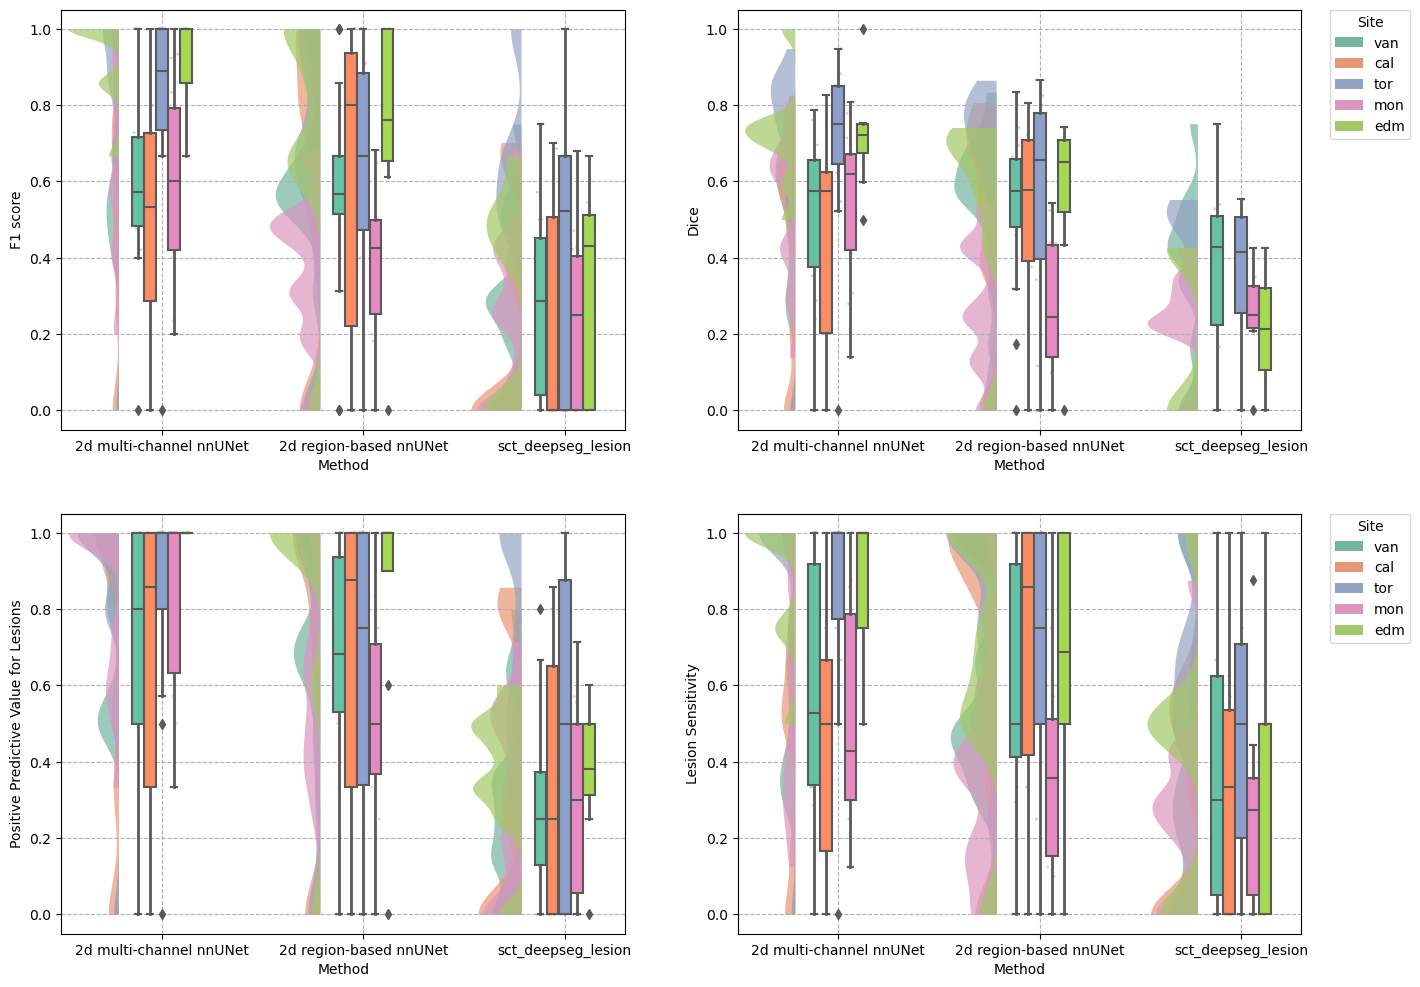

In [24]:
df1 = metrics_2d_multichannel.copy()
df1['method']='2d multi-channel nnUNet'

df2 = metrics_2d_region_based.copy()
df2['method']='2d region-based nnUNet'

df3 = metrics_sct.copy()
df3['method']='sct_deepseg_lesion'

df = pd.concat([df1,df2, df3])

df = df.rename(columns={'method': 'Method', 'site': 'Site', 'PPVL': 'Positive Predictive Value for Lesions', 'SensL': 'Lesion Sensitivity', 'F1_score': 'F1 score', 'RelativeVolumeError': 'Relative Volume Error', 'contrast': 'Contrast'})

df['method']='2d multichannel nnUNet'
fig = plt.figure(figsize=(16, 12))
plt.rcParams.update({'font.size': 10})
plt.subplot(2, 2, 1)
ax = pt.RainCloud(data=df,
                          x='Method',
                          y='F1 score',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                        #   box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},   
                          box_medianprops={"zorder": 11},    
                          )
#ax.set(xlabel=None)
ax.get_legend().remove()
ax.grid('on', linestyle='--')


plt.subplot(2, 2, 2)
ax = pt.RainCloud(data=df,
                          x='Method',
                          y='Dice',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                        #   box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},
                          
                          box_medianprops={"zorder": 11},    
                          )
#ax.set(xlabel=None)
ax.grid('on', linestyle='--')


plt.subplot(2, 2, 3)
ax = pt.RainCloud(data=df,
                          x='Method',
                          y='Positive Predictive Value for Lesions',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                         
                        #   box_meanprops={'marker': '*', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},
                          box_medianprops={"zorder": 11},    
                          )
ax.get_legend().remove()
ax.grid('on', linestyle='--')



plt.subplot(2, 2, 4)
ax = pt.RainCloud(data=df,
                          x='Method',
                          y='Lesion Sensitivity',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                        #   box_meanprops={'marker': '*', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},
                          box_medianprops={"zorder": 11},    
                          )
ax.grid('on', linestyle='--')


plt.show()